In [54]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time

In [12]:
n = 100
x_test = np.linspace(-5,5,n)
s = np.reshape((x_test.reshape(-1,1)-x_test), (n,n,1))

k = np.exp(-np.linalg.norm(s, axis=-1)**2)

In [13]:
L = np.linalg.cholesky(k+1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))

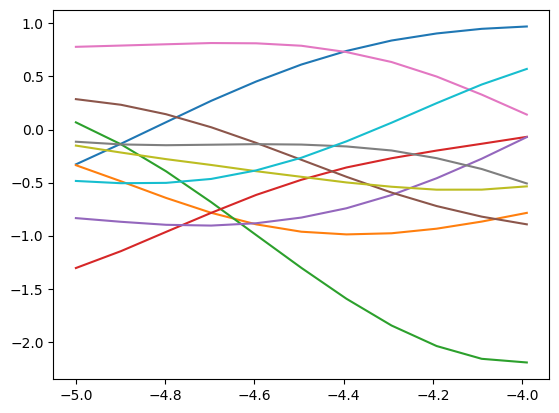

In [37]:
t = 10
plt.plot(x_test[:(t+1)], f_prior[:(t+1),:])

In [50]:
x_test.max()

5.0

In [23]:
f_prior.shape

(100, 10)

In [66]:
def create_frame(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(x_test[10*t:(10*t+10)], f_prior[10*t:(10*t+10),:])
    # plt.plot(x_test[t], f_prior[t,:], color = 'black', marker = 'o' )
    # ax.set_xlim([-5,5])
    # ax.set_ylim([-2.5,2.5])
    # ax.xlabel('x', fontsize = 14)
    # ax.ylim([0,5])
    # ax.ylabel('y', fontsize = 14)
    # ax.title(f'Relationship between x and y at step {t}',
    #          fontsize=14)
    plt.savefig(f'./img/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()

In [67]:
for i in range(0,10):
    create_frame(i)

In [60]:
frames = []
for t in range(0,100):
    image = imageio.v2.imread(f'./img/img_{t}.png')
    frames.append(image)

In [65]:
imageio.mimsave('./example.gif', # output gif
                frames,          # array of input frames
                fps = 50)         # optional: frames per second

Bayesian Coinflip updating

In [86]:
import numpy as np
import tensorflow_probability as tfp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

In [87]:
tfd = tfp.distributions

In [88]:
def update_fig(n_heads, n_tails, t):
    fig, ax = plt.subplots()
    dist = stats.beta(n_heads,n_tails)
    x = np.linspace(0,1, 100)
    y = dist.pdf(x)

    sns.lineplot(x=x, y=y, ax=ax)
    ax.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.savefig(f'./img/img_bayes_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()

In [84]:
n_heads = 1
n_tails = 1

for i in range(0,20):
    draw = tfd.Bernoulli(probs=[0.7]).sample()[0].numpy()
    if draw == 1:
        n_heads += 1
    else:
        n_tails += 1

    update_fig(n_heads, n_tails, i)

In [89]:
frames = []
for t in range(0,20):
    image = imageio.v2.imread(f'./img/img_bayes_{t}.png')
    frames.append(image)

In [91]:
imageio.mimsave('./example.gif', # output gif
                frames,          # array of input frames
                fps = 2) 